# SIR Model for Disease Spread

The **SIR Model** is an epidemic spread model consisting on a ser of differential simultaneous equations:

<center>$ \\
    $$\begin{cases} (
    S'(t) = -\lambda \dfrac{I(t) S(t)}{N}  \\  \\
    I'(t) = \lambda \dfrac{I(t) S(t)}{N} - \mu I(t)  \\  \\
    R'(t) = \mu I(t)
    \end{cases}$$
$

where $S(t)$ is the amount of individuals that are suceptible to the disease, $I(t)$ is the amount of individuals that are infected and $R(t)$ is the amount of individuals that have recovered from the disease in the instant $t$ in a total population, which, for this model is mantained constant.

The value of $λ$ and the value of $μ$ represent the contagion rate and the recovery rate for the disease.
    
This system can be solved numerically, by using, for example, the (2nd Order) Runge Kutta Method.
    
The initial conditions set for solving this system will be:

<center>$\\
    $$\begin{cases}
    N = 1000 \\ \\
    I(0) = 10 \\ \\
    S(0) = 990 \\ \\
    R(0) = 0 \\ \\
    λ = 1.0 day^{-1} \\ \\
    μ = 0.3 day^{-1}
    \end{cases}$$
$

The $O^2$ Runge-Kutta Method also requires we set integration limits and steps, which will be:

<center>$\\
    $$\begin{cases}
    t_{0} = 0 \\ \\
    t_{0} = 30 \\ \\
    h = 0.1
    \end{cases}$$
$
    
The following PYthon code will result in the curves that describe the behaviour of the epidemic with the set conditions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def f(t,x1,x2,x3):
    '''
    Function: f(t,x)
    Purpose: sets up the ODE-2D x'=f(t,x)
    Arg-in: t(float)
            x (list)
    Arg-out: f(list)
    '''
    return [l * x1 * x2/N - u * x1, -l * x1 * x2/N, u * x1] #Equations drawn from the Differential Equations System

## Initial conditions
t0 = 0.0
x10 = 10.0
x20 = 990.0
x30 = 0.0

## Constants
l = 1.0
u = 0.3
N = 1000

h = 0.1
tf = 30
n = int((tf-t0)/h)
t = np.zeros(n+1)
x = np.zeros((n+1, 3))

t[0] = t0
x[0] = [x10, x20, x30]

value_found = False

for i in range(n):
    t[i+1] = t[i] + h
    p = np.multiply(f(t[i], x[i,0], x[i,1], x[i,2]),h)
    k1 = p[0]
    l1 = p[1]
    j1 = p[2]
    q = np.multiply(f(t[i+1], x[i,0] + k1, x[i,1] + l1, x[i,2] + j1),h)
    k2 = q[0]
    l2 = q[1]
    j2 = q[2]
    x[i+1,0] = x[i,0] + (k1 + k2)/2
    x[i+1,1] = x[i,1] + (l1 + l2)/2
    x[i+1,2] = x[i,2] + (j1 + j2)/2


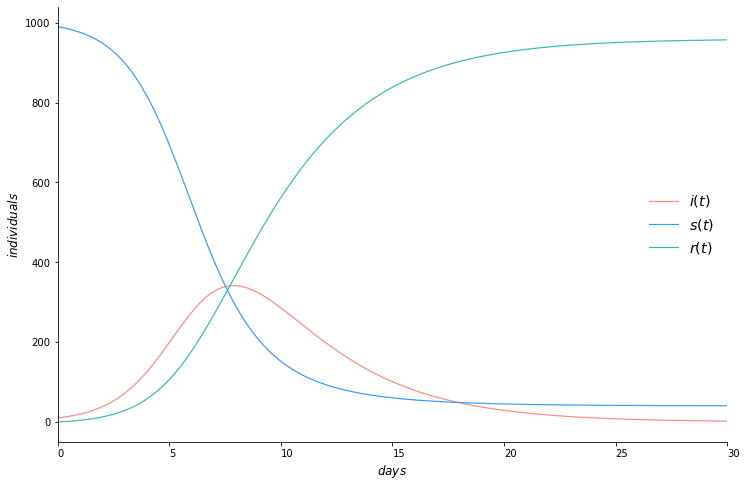

In [2]:
graph01 = plt.figure(figsize = (12, 8))

plt.plot(t,x[:,:1], label='$i(t)$', color = 'salmon', alpha = 0.9, linewidth=1.2)
plt.plot(t,x[:,1:2], label='$s(t)$', color = 'dodgerblue', alpha = 0.9, linewidth=1.2)
plt.plot(t,x[:,2:3], label='$r(t)$', color = 'lightseagreen', alpha = 0.9, linewidth=1.2)

plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=5, frameon=False, fontsize = 'x-large')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$days$', fontsize = 'large')
plt.ylabel('$individuals$', fontsize = 'large')
plt.show()

In [13]:
%matplotlib notebook
import matplotlib.animation as animation

##Lambda variation
l0 = 0.3
lf = 3.3
s = 0.05
m = int((lf-l0)/s)
l_matriz = np.zeros(m+1)
l = l0

l_matriz[0] = l0

##Initial conditions
t0 = 0.0
x10 = 10.0
x20 = 990.0
x30 = 0.0

##Constants
u = 0.3
N = 1000

h = 0.1
tf = 30
n = int((tf-t0)/h)
t = np.zeros(n+1)
x = np.zeros((n+1, 3))

t[0] = t0
x[0] = [x10, x20, x30]

t_pico = 0
matriz_duracion_epid = np.zeros(m+1)

def update_plot(curr):
    plt.cla()
    for j in range(m):
        l = l_matriz[j]
        #print("iterating with lambda = ", l_matriz[j])    
        for i in range(n):
            t[i+1] = t[i] + h
            p = np.multiply(f(t[i], x[i,0], x[i,1], x[i,2]),h)
            k1 = p[0]
            l1 = p[1]
            j1 = p[2]
            q = np.multiply(f(t[i+1], x[i,0] + k1, x[i,1] + l1, x[i,2] + j1),h)
            k2 = q[0]
            l2 = q[1]
            j2 = q[2]
            x[i+1,0] = x[i,0] + (k1 + k2)/2
            x[i+1,1] = x[i,1] + (l1 + l2)/2
            x[i+1,2] = x[i,2] + (j1 + j2)/2

            l_matriz[j+1] = l_matriz[j] + s
            
            plt.plot(t,x[:,:1], label='$i(t)$', color = 'salmon', alpha = 0.9, linewidth=1.2)
            plt.plot(t,x[:,1:2], label='$s(t)$', color = 'dodgerblue', alpha = 0.9, linewidth=1.2)
            plt.plot(t,x[:,2:3], label='$r(t)$', color = 'lightseagreen', alpha = 0.9, linewidth=1.2)
            plt.margins(x=0)
            plt.xticks(fontsize = 'medium', ha = 'left')
            plt.yticks(fontsize = 'medium')
            plt.legend(loc=5, frameon=False, fontsize = 'x-large')
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            plt.xlabel('$days$', fontsize = 'large')
            plt.ylabel('$individuals$', fontsize = 'large')
            plt.show()


<IPython.core.display.Javascript object>


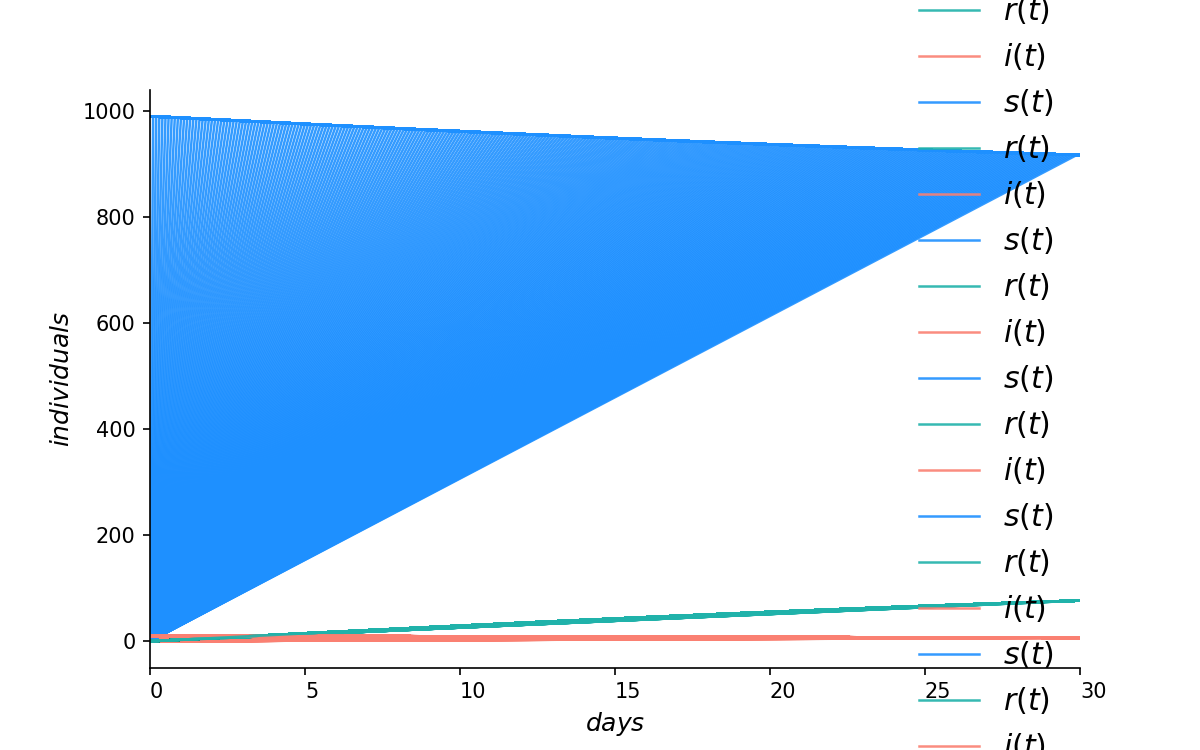

In [14]:
graph02 = plt.figure(figsize = (8, 5))
a = animation.FuncAnimation(graph02, update_plot)